# **DINOv3 Models**: AI and Human Brain Visual Alignment Simulation

The code simulates **DINOv3**-like AI processing of images and compares it with human brain responses. Early AI layers capture simple features, deep layers capture complex patterns, while simulated fMRI and MEG signals mimic human vision. Cosine similarity and visualizations reveal hierarchical alignment, reflecting how AI mirrors human visual processing.

By: **Akhilesh Pant** (MCA)

**Amrapali University**, Haldwani


# Imports

In [3]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Simulate “images”

Defines 5 “image types”.
For each type, creates a 100-number vector of random values to act like an image’s features.

In [6]:
image_types = ["Human Face", "Animal", "Nature", "Satellite", "Microscopic"]
num_images = len(image_types)
image_data = {img_type: np.random.rand(100) for img_type in image_types}

# AI brain: processing function (early & deep)

**Early layer**: takes square root → mimics simple edge/shape detection.

**Deep layer**: applies a non-linear log transform on (image + early) → mimics higher-level understanding.

In [ ]:
def ai_brain_process(image_vector):
    early_layer = np.sqrt(image_vector)
    deep_layer = np.log1p(image_vector + early_layer)
    return early_layer, deep_layer


# AI brain: run on all “images”

In [18]:
ai_early_features = {}
ai_deep_features = {}

for img_type, vector in image_data.items():
    early, deep = ai_brain_process(vector)
    ai_early_features[img_type] = early
    ai_deep_features[img_type] = deep

# Human brain: response function (fMRI + MEG) and dataset

In [21]:
def human_brain_response(image_vector):
    fmri_signal = image_vector + np.random.rand(len(image_vector)) * 0.1
    meg_signal = np.sin(image_vector * math.pi) + np.random.rand(len(image_vector)) * 0.05
    combined = (fmri_signal + meg_signal) / 2
    return combined

human_brain_data = {}
for img_type, vector in image_data.items():
    human_brain_data[img_type] = human_brain_response(vector)

# Similarity metric (cosine)

In [24]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# Overall AI-vs-Brain similarity (current approach)

In [31]:
similarities = {}
for img_type in image_types:
    # Combine AI features by averaging (both 100 -> final 100)
    ai_combined = (ai_early_features[img_type] + ai_deep_features[img_type]) / 2

    human_data = human_brain_data[img_type]

    similarity_score = cosine_similarity(ai_combined, human_data) * 100
    similarities[img_type] = similarity_score


# Print similarity scores

In [34]:
for img_type, score in similarities.items():
    print(f"{img_type}: {score:.2f}%")

Human Face: 98.45%
Animal: 97.77%
Nature: 98.26%
Satellite: 97.39%
Microscopic: 97.82%


# Plot 1 — Overall similarity bars

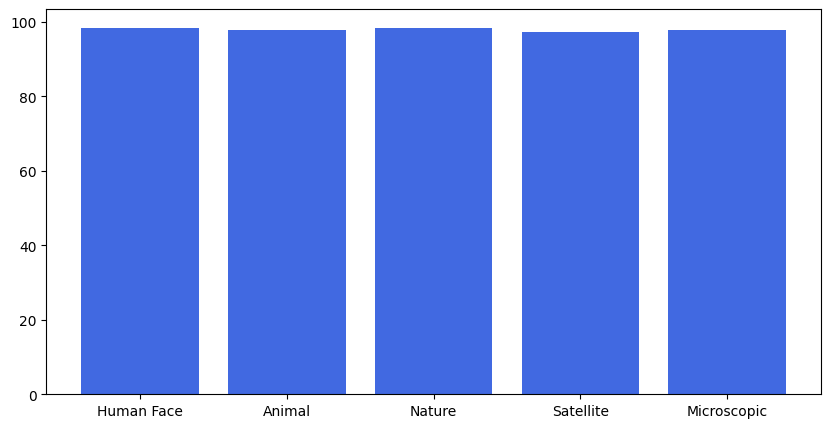

In [37]:
plt.figure(figsize=(10, 5))
plt.bar(similarities.keys(), similarities.values(), color='royalblue')
...
plt.show()

# Early vs Deep: compute separate similarities (current approach)

In [44]:
early_sim = []
deep_sim = []

for img_type in image_types:
    human_data = human_brain_data[img_type]
    mid = len(human_data) // 2
    human_early = human_data[:mid]
    human_deep = human_data[mid:]

    # Resize to match AI feature length (100)
    human_early_resized = np.resize(human_early, 100)
    human_deep_resized = np.resize(human_deep, 100)

    # Compute similarity
    early_score = cosine_similarity(ai_early_features[img_type], human_early_resized) * 100
    deep_score = cosine_similarity(ai_deep_features[img_type], human_deep_resized) * 100

    early_sim.append(early_score)
    deep_sim.append(deep_score)


# Plot 2 — Early vs Deep bars

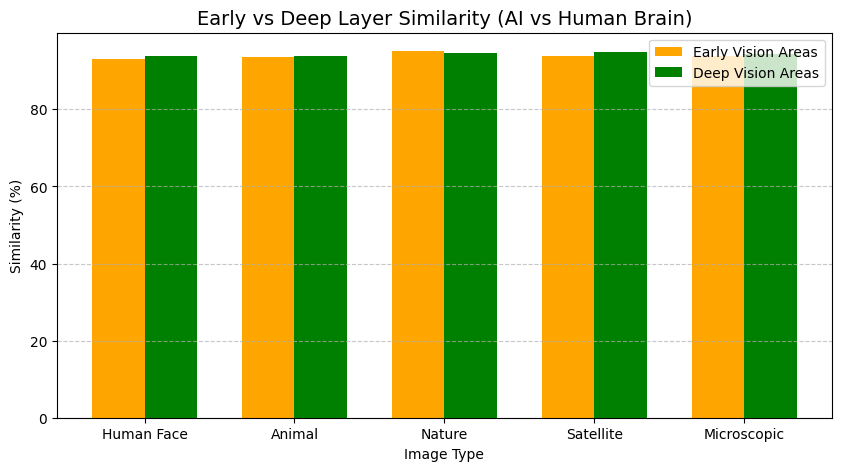

In [49]:
# ----------------------------
# 6. Early vs Deep Layer Similarity Visualization
# ----------------------------

# Create positions for each image type
x = np.arange(len(image_types))

# Define width for grouped bars
width = 0.35  # Adjust between 0.2 and 0.4 for spacing

# Plot bars
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, early_sim, width, label='Early Vision Areas', color='orange')
plt.bar(x + width/2, deep_sim, width, label='Deep Vision Areas', color='green')

# Labels and formatting
plt.title("Early vs Deep Layer Similarity (AI vs Human Brain)", fontsize=14)
plt.xlabel("Image Type")
plt.ylabel("Similarity (%)")
plt.xticks(x, image_types)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
